In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats


In [5]:
exams = pd.read_csv("exams.csv")

In [6]:
exams.head(10)

,Exam Subject,Score,Students (11th Grade),Students (12th Grade),Students (Male),Students (Female),Students (White),Students (Black),Students (Hispanic/Latino),Students (Asian),Students (American Indian/Alaska Native),Students (Native Hawaiian/Pacific Islander),Students (Two or More Races),All Students (2016)
0,ART HISTORY,5,897.00,1260.00,815.00,1889.00,1631.00,34,321.00,514.00,5,5,154.00,2704.00
1,ART HISTORY,4,1835.00,2608.00,1800.00,3787.00,3290.00,132,918.00,877.00,13,8,273.00,5587.00
2,ART HISTORY,3,2311.00,3282.00,2283.00,4657.00,3898.00,287,1347.00,992.00,19,10,307.00,6940.00
3,ART HISTORY,2,2252.00,3248.00,2374.00,4494.00,3211.00,450,1972.00,809.00,15,21,280.00,6868.00
4,ART HISTORY,1,901.00,1352.00,1072.00,1699.00,942.00,307,1074.00,292.00,13,10,87.00,2771.00
5,ART HISTORY,All,8196.00,11750.00,8344.00,16526.00,12972.00,1210,5632.00,3484.00,65,54,1101.00,24870.00
6,ART HISTORY,Average,2.95,2.93,2.87,2.98,3.11,2.29,2.55,3.15,2.72,2.57,3.12,2.94
7,BIOLOGY,5,5769.00,6396.00,8118.00,6776.00,8585.00,153,788.00,4443.00,11,7,733.00,14894.00
8,BIOLOGY,4,18585.00,21195.00,22244.00,25943.00,29999.00,976,3966.00,10367.00,75,49,2139.00,48187.00
9,BIOLOGY,3,30119.00,34631.00,30786.00,47150.00,46377.00,3305,10511.00,13051.00,183,97,3477.00,77936.00


In [7]:
students = pd.read_csv("students.csv")

In [8]:
students.head()

,Exam Subject,Schools,Students (9th Grade),Students (10th Grade),Students (11th Grade),Students (12th Grade),Students (Not High School),Students (> 9th Grade),Students (Grade Not Known),Students (Male),...,Students (Asian),Students (American Indian/Alaska Native),Students (Native Hawaiian/Pacific Islander),Students (Two or More Races),Students (Other Race),Students (Race Not Known),All Students (2015),All Students (2016),% Change 2015-2016,Colleges
0,ART HISTORY,2054.0,345,4252,8420,12097,14,1,394,8531,...,3484,65,54,1101,34,318,23314.0,25523,9,1239.0
1,BIOLOGY,11170.0,3995,32208,90509,108072,151,37,3108,93050,...,39395,683,344,9873,231,2923,223479.0,238080,7,2775.0
2,CALCULUS AB,14368.0,727,7651,83254,212023,910,98,3552,156673,...,49419,721,451,11395,396,2888,302532.0,308215,2,3012.0
3,CALCULUS BC,7418.0,451,4483,35233,82863,583,62,1256,72333,...,31893,162,131,4700,244,1057,118707.0,124931,5,1914.0
4,CHEMISTRY,9233.0,338,13940,85519,51785,402,24,1457,77370,...,32106,365,197,5997,142,1551,152745.0,153465,0,2383.0


In [16]:
exams.columns

Index(['Exam Subject', 'Score', 'Students (11th Grade)',
       'Students (12th Grade)', 'Students (Male)', 'Students (Female)',
       'Students (White)', 'Students (Black)', 'Students (Hispanic/Latino)',
       'Students (Asian)', 'Students (American Indian/Alaska Native)',
       'Students (Native Hawaiian/Pacific Islander)',
       'Students (Two or More Races)', 'All Students (2016)'],
      dtype='object')

In [18]:
exams.dtypes

Exam Subject                                    object
Score                                           object
Students (11th Grade)                          float64
Students (12th Grade)                          float64
Students (Male)                                float64
Students (Female)                              float64
Students (White)                               float64
Students (Black)                                object
Students (Hispanic/Latino)                     float64
Students (Asian)                               float64
Students (American Indian/Alaska Native)        object
Students (Native Hawaiian/Pacific Islander)     object
Students (Two or More Races)                   float64
All Students (2016)                            float64
dtype: object

In [9]:
exams["Exam Subject"].value_counts()

GOVERNMENT & POLITICS: U.S.           7
PHYSICS 1                             7
CHINESE LANGUAGE & CULTURE            7
LATIN                                 7
ITALIAN LANGUAGE & CULTURE            7
EUROPEAN HISTORY                      7
GOVERNMENT & POLITICS: COMPARATIVE    7
RESEARCH                              7
CALCULUS AB                           7
STUDIO ART: DRAWING                   7
HUMAN GEOGRAPHY                       7
COMPUTER SCIENCE A                    7
ENGLISH LANGUAGE & COMPOSITION        7
STUDIO ART: 3-D DESIGN                7
SPANISH LANGUAGE                      7
CHEMISTRY                             7
WORLD HISTORY                         7
PHYSICS C: ELECTRICITY & MAGNETISM    7
SPANISH LITERATURE                    7
PSYCHOLOGY                            7
ENVIRONMENTAL SCIENCE                 7
JAPANESE LANGUAGE & CULTURE           7
PHYSICS C: MECHANICS                  7
ART HISTORY                           7
U.S. HISTORY                          7


In [21]:
exams[exams["Exam Subject"] == "ENGLISH LITERATURE & COMPOSITION"]

exams["Percent Latino"] = exams["Students (Hispanic/Latino)"] / exams["All Students (2016)"]

In [22]:
exams.head()

,Exam Subject,Score,Students (11th Grade),Students (12th Grade),Students (Male),Students (Female),Students (White),Students (Black),Students (Hispanic/Latino),Students (Asian),Students (American Indian/Alaska Native),Students (Native Hawaiian/Pacific Islander),Students (Two or More Races),All Students (2016),Percent Black,Percent Latino
0,ART HISTORY,5,897.0,1260.0,815.0,1889.0,1631.0,34,321.0,514.0,5,5,154.0,2704.0,0.118713,0.118713
1,ART HISTORY,4,1835.0,2608.0,1800.0,3787.0,3290.0,132,918.0,877.0,13,8,273.0,5587.0,0.164310,0.164310
2,ART HISTORY,3,2311.0,3282.0,2283.0,4657.0,3898.0,287,1347.0,992.0,19,10,307.0,6940.0,0.194092,0.194092
3,ART HISTORY,2,2252.0,3248.0,2374.0,4494.0,3211.0,450,1972.0,809.0,15,21,280.0,6868.0,0.287129,0.287129
4,ART HISTORY,1,901.0,1352.0,1072.0,1699.0,942.0,307,1074.0,292.0,13,10,87.0,2771.0,0.387586,0.387586


In [24]:
author_by_race = pd.read_csv("AuthorsByRace.csv", encoding = "ISO-8859-1")

In [25]:
author_by_race.head()

,Author,Race
0,Aberjhani,African-American
1,Mumia Abu-Jamalÿ(born 1954),African-American
2,"Linda Addisonÿ(born 1952), author and poet",African-American
3,"Rochelle Alersÿ(born 1963), author and artist",African-American
4,Kwame Alexander,African-American


In [35]:
#projects = pd.read_csv("Projects.csv")
#schools = pd.read_csv("Schools.csv")
#donations = pd.read_csv("Donations.csv")
#teachers = pd.read_csv("Teachers.csv")

ParserError: Error tokenizing data. C error: EOF inside string starting at line 285447

In [36]:
winedata = pd.read_csv("winemag-data.csv")

In [37]:
winedata.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [38]:
winedata.dtypes

Unnamed: 0                 int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

In [39]:
winedata.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


Text(0.5,1,'Scatterplot of Points Versus Price')

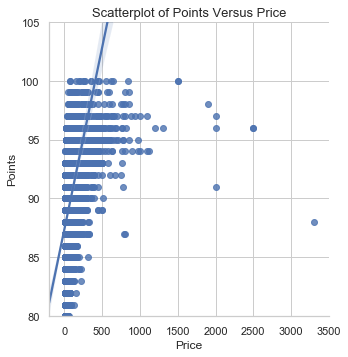

In [42]:
sns.set(style="whitegrid")
sns.lmplot(y="points", x="price", data=winedata, fit_reg=True)
plt.ylim(80,105)
plt.xlabel("Price")
plt.ylabel("Points")
plt.title("Scatterplot of Points Versus Price", fontsize=13)

In [43]:
df1 = pd.read_csv("restaurant-and-market-health-inspections.csv")

In [44]:
df1.head()

,serial_number,activity_date,facility_name,score,grade,service_code,service_description,employee_id,facility_address,facility_city,facility_id,facility_state,facility_zip,owner_id,owner_name,pe_description,program_element_pe,program_name,program_status,record_id
0,DAJ00E07B,2017-12-29T00:00:00,HABITAT COFFEE SHOP,95,A,1,ROUTINE INSPECTION,EE0000923,3708 N EAGLE ROCK BLVD,LOS ANGELES,FA0170465,CA,90065,OW0178123,GLASSELL COFFEE SHOP LLC,RESTAURANT (0-30) SEATS MODERATE RISK,1631,HABITAT COFFEE SHOP,ACTIVE,PR0160774
1,DAQOKRFZB,2017-12-29T00:00:00,REILLY'S,92,A,1,ROUTINE INSPECTION,EE0000633,100 WORLD WAY # 120,LOS ANGELES,FA0244690,CA,90045,OW0208441,"AREAS SKYVIEW LAX JV, LLC",RESTAURANT (0-30) SEATS MODERATE RISK,1631,REILLY'S,ACTIVE,PR0193026
2,DASJI4LUR,2017-12-29T00:00:00,STREET CHURROS,93,A,1,ROUTINE INSPECTION,EE0000835,6801 HOLLYWOOD BLVD # 253,LOS ANGELES,FA0224109,CA,90028,OW0228670,"STREETCHURROS, INC",RESTAURANT (0-30) SEATS LOW RISK,1630,STREET CHURROS,ACTIVE,PR0179282
3,DAWVA0CY3,2017-12-29T00:00:00,RIO GENTLEMANS CLUB,93,A,1,ROUTINE INSPECTION,EE0000958,13124 S FIGUEROA ST,LOS ANGELES,FA0046462,CA,90064,OW0011830,FIGUEROA GROUP INC,RESTAURANT (61-150) SEATS LOW RISK,1636,RIO GENTLEMANS CLUB,ACTIVE,PR0044776
4,DAKFCHD0L,2017-12-29T00:00:00,LE PAIN QUOTIDIEN,93,A,1,ROUTINE INSPECTION,EE0000629,13050 SAN VICENTE BLVD STE 114,LOS ANGELES,FA0034788,CA,90049,OW0028928,PQ SAN VICENTE INC.,RESTAURANT (61-150) SEATS HIGH RISK,1638,LE PAIN QUOTIDIEN,ACTIVE,PR0017456


In [46]:
df1["service_description"].value_counts()

ROUTINE INSPECTION                  57881
OWNER INITIATED ROUTINE INSPECT.      991
Name: service_description, dtype: int64

In [47]:
df1["grade"].value_counts()

A    54904
B     3676
C      291
         1
Name: grade, dtype: int64

In [50]:
df1[df1["service_description"] == "OWNER INITIATED ROUTINE INSPECT."]["grade"].value_counts()

A    925
B     63
C      3
Name: grade, dtype: int64

In [51]:
54904 / len(df1["grade"])

0.9325995379807039

In [54]:
925 / len(df1[df1["service_description"] == "OWNER INITIATED ROUTINE INSPECT."])

0.9334006054490414

In [55]:
df2 = pd.read_csv("my-settlers-of-catan-games-catanstats.csv")

In [56]:
df2.head()

,gameNum,player,points,me,2,3,4,5,6,7,...,Unnamed: 26,production,tradeGain,robberCardsGain,totalGain,tradeLoss,robberCardsLoss,tribute,totalLoss,totalAvailable
0,1,1,5,NaN,1,3,5,8,7,10,...,O,38,5,2,45,10,2,4,16,29
1,1,2,9,1.0,1,3,5,8,7,10,...,O,48,8,6,62,11,1,8,20,42
2,1,3,10,NaN,1,3,5,8,7,10,...,C,44,14,9,67,24,4,0,28,39
3,1,4,5,NaN,1,3,5,8,7,10,...,S,42,12,0,54,24,6,0,30,24
4,2,1,10,NaN,1,6,3,9,10,8,...,2L,60,15,16,91,28,10,0,38,53


In [57]:
df2.columns

Index(['gameNum', 'player', 'points', 'me', '2', '3', '4', '5', '6', '7', '8',
       '9', '10', '11', '12', 'settlement1', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'settlement2',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'production', 'tradeGain', 'robberCardsGain',
       'totalGain', 'tradeLoss', 'robberCardsLoss', 'tribute', 'totalLoss',
       'totalAvailable'],
      dtype='object')

In [58]:
df3 = pd.read_csv("NFA 2018.csv")

In [59]:
df3.head()

,country,ISO alpha-3 code,UN_region,UN_subregion,year,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,Percapita GDP (2010 USD),population
0,Armenia,ARM,Asia,Western Asia,1992,BiocapPerCap,1.611286e-01,0.135023,0.083836,0.013718,0.033669,0.000000e+00,4.273741e-01,949.033,3449000
1,Armenia,ARM,Asia,Western Asia,1992,BiocapTotGHA,5.558130e+05,465763.337400,289190.662300,47320.224590,116139.598200,0.000000e+00,1.474227e+06,949.033,3449000
2,Armenia,ARM,Asia,Western Asia,1992,EFConsPerCap,3.909225e-01,0.189137,0.000001,0.004138,0.033669,1.112225e+00,1.730092e+00,949.033,3449000
3,Armenia,ARM,Asia,Western Asia,1992,EFConsTotGHA,1.348487e+06,652429.066600,4.327841,14272.803690,116139.598200,3.836620e+06,5.967954e+06,949.033,3449000
4,Armenia,ARM,Asia,Western Asia,1992,EFExportsPerCap,1.124910e-03,0.002283,0.000000,0.000438,0.000000,4.819043e-02,5.203676e-02,949.033,3449000


In [62]:
df3.dtypes

country                      object
ISO alpha-3 code             object
UN_region                    object
UN_subregion                 object
year                          int64
record                       object
crop_land                   float64
grazing_land                float64
forest_land                 float64
fishing_ground              float64
built_up_land               float64
carbon                      float64
total                       float64
Percapita GDP (2010 USD)    float64
population                    int64
dtype: object

In [71]:
df3["% Forest"] = df3["forest_land"] / df3["total"]
df3["% Built Up"] = df3["built_up_land"] / df3["total"]

In [76]:
df3.head(10)

,country,ISO alpha-3 code,UN_region,UN_subregion,year,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,Percapita GDP (2010 USD),population,% Forest,% Built Up
0,Armenia,ARM,Asia,Western Asia,1992,BiocapPerCap,1.611286e-01,0.135023,0.083836,0.013718,0.033669,0.000000e+00,4.273741e-01,949.033,3449000,1.961643e-01,0.078780
1,Armenia,ARM,Asia,Western Asia,1992,BiocapTotGHA,5.558130e+05,465763.337400,289190.662300,47320.224590,116139.598200,0.000000e+00,1.474227e+06,949.033,3449000,1.961643e-01,0.078780
2,Armenia,ARM,Asia,Western Asia,1992,EFConsPerCap,3.909225e-01,0.189137,0.000001,0.004138,0.033669,1.112225e+00,1.730092e+00,949.033,3449000,7.225048e-07,0.019461
3,Armenia,ARM,Asia,Western Asia,1992,EFConsTotGHA,1.348487e+06,652429.066600,4.327841,14272.803690,116139.598200,3.836620e+06,5.967954e+06,949.033,3449000,7.251800e-07,0.019461
4,Armenia,ARM,Asia,Western Asia,1992,EFExportsPerCap,1.124910e-03,0.002283,0.000000,0.000438,0.000000,4.819043e-02,5.203676e-02,949.033,3449000,0.000000e+00,0.000000
5,Armenia,ARM,Asia,Western Asia,1992,EFExportsTotGHA,3.880378e+03,7875.331688,0.000000,1512.195296,0.000000,1.662329e+05,1.795008e+05,949.033,3449000,0.000000e+00,0.000000
6,Armenia,ARM,Asia,Western Asia,1992,EFImportsPerCap,2.309189e-01,0.056397,0.000001,0.003312,0.000000,8.791121e-02,3.785406e-01,949.033,3449000,3.302155e-06,0.000000
7,Armenia,ARM,Asia,Western Asia,1992,EFImportsTotGHA,7.965547e+05,194541.060900,4.327841,11426.058040,0.000000,3.032497e+05,1.305776e+06,949.033,3449000,3.314382e-06,0.000000
8,Armenia,ARM,Asia,Western Asia,1992,EFProdPerCap,1.611286e-01,0.135023,0.000000,0.001264,0.033669,1.072504e+00,1.403588e+00,949.033,3449000,0.000000e+00,0.023987
9,Armenia,ARM,Asia,Western Asia,1992,EFProdTotGHA,5.558130e+05,465763.337400,0.000000,4358.940944,116139.598200,3.699604e+06,4.841678e+06,949.033,3449000,0.000000e+00,0.023987


Text(0.5,1,'Scatterplot of Forest Land versus Carbon')

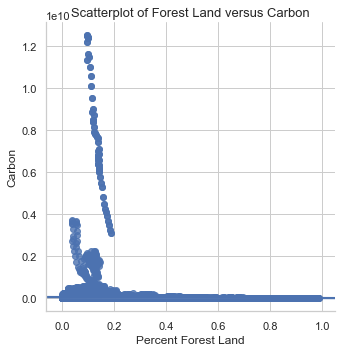

In [73]:
sns.set(style="whitegrid")
sns.lmplot(y="carbon", x="% Forest", data=df3, fit_reg=True)
plt.xlabel("Percent Forest Land")
plt.ylabel("Carbon")
plt.title("Scatterplot of Forest Land versus Carbon", fontsize=13)

Text(0.5,1,'Scatterplot of Built Up Land versus Carbon')

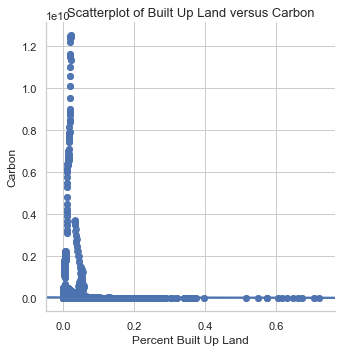

In [74]:
sns.set(style="whitegrid")
sns.lmplot(y="carbon", x="% Built Up", data=df3, fit_reg=True)
plt.xlabel("Percent Built Up Land")
plt.ylabel("Carbon")
plt.title("Scatterplot of Built Up Land versus Carbon", fontsize=13)

In [75]:
df3.describe()

,year,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,Percapita GDP (2010 USD),population,% Forest,% Built Up
count,87020.000000,6.353000e+04,6.353000e+04,6.353000e+04,6.353000e+04,6.353000e+04,6.353000e+04,8.702000e+04,71410.000000,8.702000e+04,63530.000000,63530.000000
mean,1989.193059,1.465068e+07,6.324612e+06,1.531334e+07,3.576364e+06,1.311909e+06,2.591459e+07,5.217695e+07,10129.722779,6.305956e+07,0.182613,0.018095
std,15.490923,1.445766e+08,6.237420e+07,1.798437e+08,3.905889e+07,1.448057e+07,3.448775e+08,5.890184e+08,15646.206882,4.264394e+08,0.194765,0.030095
min,1961.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.150000e-05,115.794000,5.000000e+03,0.000000,0.000000
25%,1976.000000,3.027605e-01,7.470049e-02,1.508091e-01,3.252735e-02,0.000000e+00,1.946352e-02,1.313131e+00,988.470000,2.001000e+06,0.037355,0.000000
50%,1990.000000,2.841671e+00,2.526463e+00,3.110603e+00,3.670478e+00,3.247780e-02,1.293047e+00,1.858845e+02,3153.740000,6.632500e+06,0.110431,0.007863
75%,2003.000000,2.027347e+06,6.580112e+05,1.497303e+06,2.436509e+05,5.794159e+04,9.168465e+05,7.792829e+06,11972.100000,2.056300e+07,0.266100,0.026440
max,2014.000000,3.996304e+09,1.576582e+09,5.496461e+09,1.127790e+09,4.649979e+08,1.251963e+10,2.060191e+10,113682.000000,7.265786e+09,0.989228,0.720516


In [77]:
df3["record"].value_counts()

EFImportsPerCap    8702
BiocapTotGHA       8702
EFConsPerCap       8702
EFImportsTotGHA    8702
EFProdPerCap       8702
EFProdTotGHA       8702
EFConsTotGHA       8702
EFExportsPerCap    8702
EFExportsTotGHA    8702
BiocapPerCap       8702
Name: record, dtype: int64

In [78]:
BiocapPerCap = df3[df3["record"] == "BiocapPerCap"]

In [79]:
BiocapPerCap.head()

,country,ISO alpha-3 code,UN_region,UN_subregion,year,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,Percapita GDP (2010 USD),population,% Forest,% Built Up
0,Armenia,ARM,Asia,Western Asia,1992,BiocapPerCap,0.161129,0.135023,0.083836,0.013718,0.033669,0.0,0.427374,949.033,3449000,0.196164,0.078780
10,Armenia,ARM,Asia,Western Asia,1993,BiocapPerCap,0.159855,0.138346,0.085972,0.014035,0.031968,0.0,0.430176,886.033,3370000,0.199852,0.074313
20,Armenia,ARM,Asia,Western Asia,1994,BiocapPerCap,0.163498,0.143906,0.088097,0.014349,0.031476,0.0,0.441324,956.471,3290000,0.199619,0.071321
30,Armenia,ARM,Asia,Western Asia,1995,BiocapPerCap,0.164997,0.156922,0.089827,0.014604,0.031497,0.0,0.457846,1043.540,3223000,0.196195,0.068795
40,Armenia,ARM,Asia,Western Asia,1996,BiocapPerCap,0.192977,0.169791,0.091378,0.014814,0.035410,0.0,0.504369,1121.880,3173000,0.181172,0.070207


In [80]:
BiocapPerCap["year"].value_counts()

2014    189
2011    184
2013    184
2012    184
2008    183
2009    183
2010    183
2007    183
2006    183
2004    182
2005    182
2000    181
2003    181
2001    181
2002    181
1999    180
1998    179
1996    178
1997    178
1995    176
1994    175
1993    174
1992    172
1988    156
1989    156
1991    156
1987    156
1990    156
1986    156
1985    155
1984    155
1982    154
1983    154
1981    153
1980    151
1979    147
1975    146
1973    146
1976    146
1974    146
1977    146
1978    146
1971    144
1972    144
1969    142
1970    142
1968    142
1967    140
1966    139
1965    137
1964    136
1963    133
1961    133
1962    133
Name: year, dtype: int64

In [82]:
BPC2014 = BiocapPerCap[BiocapPerCap["year"] == 2014]

Text(0.5,1,'Scatterplot of Forest Land versus Carbon')

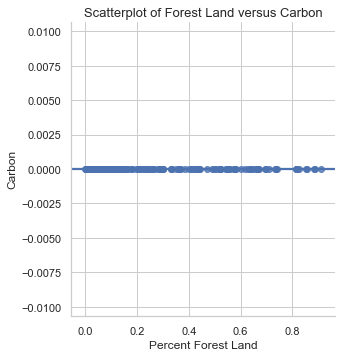

In [83]:
sns.set(style="whitegrid")
sns.lmplot(y="carbon", x="% Forest", data=BPC2014, fit_reg=True)
plt.xlabel("Percent Forest Land")
plt.ylabel("Carbon")
plt.title("Scatterplot of Forest Land versus Carbon", fontsize=13)

In [85]:
EFGHA2014 = df3[(df3["record"] == "EFConsTotGHA") & (df3["year"] == 2014)]

In [86]:
EFGHA2014.head()

,country,ISO alpha-3 code,UN_region,UN_subregion,year,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,Percapita GDP (2010 USD),population,% Forest,% Built Up
223,Armenia,ARM,Asia,Western Asia,2014,EFConsTotGHA,1.869098e+06,6.746236e+05,7.596324e+05,1.943662e+04,1.850463e+05,2.560362e+06,6.068199e+06,3827.340,3006000,0.125183,0.030494
763,Afghanistan,AFG,Asia,Southern Asia,2014,EFConsTotGHA,9.928420e+06,5.910276e+06,2.220737e+06,7.836169e+03,1.458819e+06,4.898568e+06,2.442466e+07,610.242,31628000,0.090922,0.059727
1303,Albania,ALB,Europe,Southern Europe,2014,EFConsTotGHA,1.878695e+06,6.904705e+05,8.387929e+05,7.302416e+04,1.149292e+05,2.592727e+06,6.188639e+06,4413.560,2890000,0.135538,0.018571
1843,Algeria,DZA,Africa,Northern Africa,2014,EFConsTotGHA,2.268643e+07,7.134556e+06,6.739892e+06,6.011608e+05,1.092607e+06,5.708592e+07,9.534057e+07,4675.890,38934000,0.070693,0.011460
2383,Angola,AGO,Africa,Middle Africa,2014,EFConsTotGHA,9.281380e+06,2.324783e+06,2.670939e+06,3.583284e+06,1.144945e+06,1.876227e+07,3.776760e+07,3747.570,24228000,0.070720,0.030316


In [92]:
EFGHA2014.describe()

,year,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,Percapita GDP (2010 USD),population,% Forest,% Built Up
count,189.0,1.660000e+02,1.660000e+02,1.660000e+02,1.660000e+02,1.660000e+02,1.660000e+02,1.890000e+02,175.000000,1.890000e+02,166.000000,166.000000
mean,2014.0,4.771505e+07,1.312001e+07,2.401902e+07,7.824223e+06,6.097256e+06,1.471523e+08,2.172337e+08,12766.247806,7.679885e+07,0.148640,0.029029
std,0.0,3.179426e+08,8.369486e+07,1.593630e+08,5.335439e+07,3.863929e+07,1.010458e+09,1.555241e+09,18240.243931,5.447867e+08,0.119048,0.021424
min,2014.0,2.772886e+04,1.257026e+04,2.014498e+04,3.607414e+03,0.000000e+00,1.613889e+05,2.356547e+04,243.102000,5.000000e+03,0.009240,0.000000
25%,2014.0,1.603139e+06,5.718978e+05,9.015499e+05,1.324347e+05,1.799655e+05,2.076479e+06,5.473323e+06,1536.765000,2.076000e+06,0.067575,0.011463
50%,2014.0,5.600675e+06,1.510080e+06,2.985476e+06,5.372592e+05,6.814245e+05,9.210612e+06,2.226404e+07,4992.910000,8.517000e+06,0.109854,0.025710
75%,2014.0,1.635445e+07,5.830276e+06,7.688189e+06,2.731846e+06,1.866892e+06,3.279708e+07,6.395466e+07,14410.550000,2.721600e+07,0.193980,0.038743
max,2014.0,3.996304e+09,1.049453e+09,2.016300e+09,6.742609e+08,4.649979e+08,1.240060e+10,2.060191e+10,107153.000000,7.265786e+09,0.641524,0.107068


Text(0.5,1,'Scatterplot of Forest Land versus Carbon')

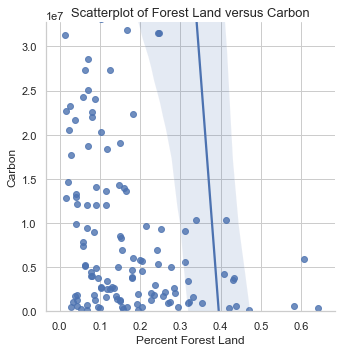

In [93]:
sns.set(style="whitegrid")
sns.lmplot(y="carbon", x="% Forest", data=EFGHA2014, fit_reg=True)
plt.xlabel("Percent Forest Land")
plt.ylabel("Carbon")
plt.ylim(0,3.279708e+07)
plt.title("Scatterplot of Forest Land versus Carbon", fontsize=13)

Text(0.5,1,'Scatterplot of Built Up Land versus Carbon')

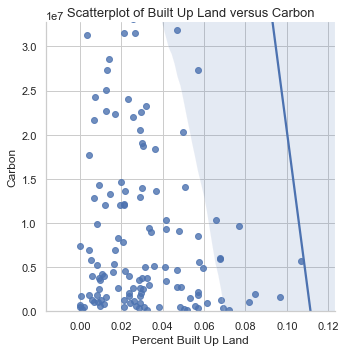

In [95]:
sns.set(style="whitegrid")
sns.lmplot(y="carbon", x="% Built Up", data=EFGHA2014, fit_reg=True)
plt.xlabel("Percent Built Up Land")
plt.ylabel("Carbon")
plt.ylim(0,3.279708e+07)
plt.title("Scatterplot of Built Up Land versus Carbon", fontsize=13)

##Considering an A/B test wherein I would have half of the countries plant more forest land and the other half not with the hypothesis that the countries that plant more forest land will be creating less carbon in the environment. Too obvious?

In [104]:
df4 = pd.read_csv("VGRevenueReport.csv", encoding = "ISO-8859-1")

In [105]:
df4.head()

,Establishment,License Number,Municipality,VGT Count,Amount Played,Amount Won,Net Wager,Funds In,Funds Out,NTI,NTI Tax Rate (30%),State Share,Municipality Share
0,"BLUEHAVEN ENTERPRISES, LLC",170702474,Adams County,3,12867.47,10828.80,2038.67,5225.0,3186.33,2038.67,611.62,509.69,101.93
1,"""ALWAYS AFTER 5"", INC.",140700460,Springfield,5,2396358.91,2207565.26,188793.65,806600.0,617806.50,188793.50,56638.72,47198.96,9439.76
2,"""Mt. Morris Moose Lodge No. 1551, Loyal Order ...",130802222,Mount Morris,4,623916.73,572814.46,51102.27,210294.0,159191.64,51102.36,15331.09,12775.89,2555.20
3,"""Tammy's Hallway Inc.""",120700412,Centralia,5,2186913.36,2001811.78,185101.58,654670.0,469568.42,185101.58,55531.05,46275.89,9255.16
4,"""The Original"" Little Joe's Pizza, Inc.",160703400,New Lenox,3,2199572.73,2031444.43,168128.30,592150.0,424021.70,168128.30,50438.88,42032.40,8406.48


In [106]:
2396358.91 - 188793.65

2207565.2600000002

In [107]:
df4["VGT Count"].value_counts()

5    4790
4    1044
3    1019
2     225
1      47
0      22
Name: VGT Count, dtype: int64

In [108]:
df4[df4["VGT Count"] == 5].describe()

,License Number,VGT Count,Amount Played,Amount Won,Net Wager,Funds In,Funds Out,NTI,NTI Tax Rate (30%),State Share,Municipality Share
count,4.790000e+03,4790.0,4.790000e+03,4.790000e+03,4.790000e+03,4.790000e+03,4.790000e+03,4.790000e+03,4790.000000,4790.000000,4790.000000
mean,1.409264e+08,5.0,3.581330e+06,3.293798e+06,2.875318e+05,1.119437e+06,8.318988e+05,2.875378e+05,86261.719119,71884.783052,14376.936067
std,1.976695e+07,0.0,2.814359e+06,2.590724e+06,2.254479e+05,8.580932e+05,6.368138e+05,2.254529e+05,67636.078293,56363.401381,11272.676912
min,1.207001e+08,5.0,0.000000e+00,0.000000e+00,-1.273970e+03,0.000000e+00,0.000000e+00,-1.273970e+03,-382.200000,-318.500000,-63.700000
25%,1.207100e+08,5.0,1.638277e+06,1.509001e+06,1.314227e+05,5.239212e+05,3.866706e+05,1.314228e+05,39427.205000,32856.020000,6571.185000
50%,1.407001e+08,5.0,2.850352e+06,2.617077e+06,2.284679e+05,9.039730e+05,6.702451e+05,2.284678e+05,68541.005000,57117.530000,11423.475000
75%,1.607014e+08,5.0,4.791139e+06,4.403096e+06,3.839115e+05,1.503038e+06,1.124897e+06,3.839173e+05,115175.870000,95979.890000,19195.980000
max,1.810018e+08,5.0,2.604723e+07,2.400746e+07,2.039766e+06,7.939076e+06,5.899361e+06,2.039715e+06,611915.600000,509929.690000,101985.910000


In [109]:
df4[df4["VGT Count"] == 4].describe()

,License Number,VGT Count,Amount Played,Amount Won,Net Wager,Funds In,Funds Out,NTI,NTI Tax Rate (30%),State Share,Municipality Share
count,1.044000e+03,1044.0,1.044000e+03,1.044000e+03,1044.000000,1.044000e+03,1.044000e+03,1044.000000,1044.000000,1044.000000,1044.000000
mean,1.391741e+08,4.0,1.258085e+06,1.157538e+06,100546.171245,3.925893e+05,2.920407e+05,100548.553036,30164.077031,25136.743400,5027.333630
std,1.933268e+07,0.0,9.440985e+05,8.704094e+05,74422.283973,2.825962e+05,2.105406e+05,74426.503981,22328.265141,18606.891897,3721.373244
min,1.207002e+08,4.0,0.000000e+00,0.000000e+00,-2.230000,0.000000e+00,0.000000e+00,-2.230000,-0.660000,-0.550000,-0.110000
25%,1.207093e+08,4.0,6.676400e+05,6.138298e+05,55399.695000,2.160082e+05,1.591261e+05,55399.832500,16620.205000,13850.180000,2770.025000
50%,1.307054e+08,4.0,1.131161e+06,1.040606e+06,90506.480000,3.542735e+05,2.623876e+05,90506.495000,27095.625000,22579.700000,4515.925000
75%,1.607001e+08,4.0,1.676245e+06,1.541663e+06,132159.230000,5.151448e+05,3.816253e+05,132159.230000,39648.137500,33040.142500,6607.995000
max,1.807018e+08,4.0,1.055829e+07,9.711159e+06,847130.940000,2.813388e+06,1.965883e+06,847505.260000,254252.060000,211876.740000,42375.320000


In [110]:
df4[df4["VGT Count"] == 3].describe()

,License Number,VGT Count,Amount Played,Amount Won,Net Wager,Funds In,Funds Out,NTI,NTI Tax Rate (30%),State Share,Municipality Share
count,1.019000e+03,1019.0,1.019000e+03,1.019000e+03,1019.000000,1.019000e+03,1.019000e+03,1019.000000,1019.000000,1019.000000,1019.000000
mean,1.444164e+08,3.0,7.393575e+05,6.797452e+05,59612.284190,2.291201e+05,1.695056e+05,59614.505633,17884.043660,14903.379087,2980.664573
std,1.952565e+07,0.0,6.437961e+05,5.930304e+05,51377.139609,1.924290e+05,1.423283e+05,51377.720502,15413.691526,12844.745851,2568.945675
min,1.207001e+08,3.0,7.276500e+02,6.107400e+02,-168.460000,4.180000e+02,3.010900e+02,-168.460000,-50.540000,-42.120000,-8.420000
25%,1.209042e+08,3.0,2.958393e+05,2.697019e+05,24983.495000,9.746850e+04,7.128551e+04,24983.620000,7495.320000,6246.105000,1249.215000
50%,1.407034e+08,3.0,5.929725e+05,5.453196e+05,48019.200000,1.868490e+05,1.353187e+05,48019.200000,14405.830000,12004.860000,2400.970000
75%,1.607028e+08,3.0,9.923666e+05,9.138686e+05,81996.280000,3.093555e+05,2.253037e+05,81996.365000,24599.380000,20499.500000,4099.880000
max,1.807031e+08,3.0,5.592660e+06,5.133935e+06,458725.140000,1.625235e+06,1.166510e+06,458725.140000,137617.940000,114681.640000,22936.300000


In [111]:
df4[df4["VGT Count"] == 2].describe()

,License Number,VGT Count,Amount Played,Amount Won,Net Wager,Funds In,Funds Out,NTI,NTI Tax Rate (30%),State Share,Municipality Share
count,2.250000e+02,225.0,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
mean,1.400927e+08,2.0,4.246643e+05,3.907192e+05,33945.090133,132477.133333,98531.700044,33945.433289,10180.604089,8483.840978,1696.763111
std,1.815947e+07,0.0,3.868989e+05,3.581544e+05,29314.577079,116332.563621,88361.384643,29314.485750,8797.161906,7330.970890,1466.191016
min,1.207003e+08,2.0,7.700000e-01,2.360000e+00,-371.860000,80.000000,81.590000,-371.860000,-111.550000,-92.960000,-18.590000
25%,1.207108e+08,2.0,1.526343e+05,1.380347e+05,13519.020000,54232.000000,40990.780000,13519.020000,4055.840000,3379.860000,675.980000
50%,1.407006e+08,2.0,3.347528e+05,3.073798e+05,28319.050000,111562.000000,80988.100000,28318.900000,8495.840000,7079.880000,1415.960000
75%,1.507040e+08,2.0,5.491296e+05,5.021803e+05,45088.050000,174471.000000,135158.270000,45087.920000,13526.570000,11272.130000,2254.440000
max,1.807021e+08,2.0,2.352586e+06,2.185725e+06,174424.350000,749214.000000,582353.140000,174424.220000,52327.530000,43606.290000,8721.240000


In [112]:
df4[df4["VGT Count"] == 1].describe()

,License Number,VGT Count,Amount Played,Amount Won,Net Wager,Funds In,Funds Out,NTI,NTI Tax Rate (30%),State Share,Municipality Share
count,4.700000e+01,47.0,4.700000e+01,4.700000e+01,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,1.438951e+08,1.0,5.847481e+05,5.384464e+05,46301.692766,183061.659574,136759.577447,46302.082128,13890.801489,11575.674468,2315.127021
std,1.830758e+07,0.0,5.421589e+05,5.003165e+05,42697.629950,169234.600948,127693.678320,42697.904572,12809.489062,10674.574870,2134.914191
min,1.207013e+08,1.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.100000,-0.100000,-0.030000,-0.020000,-0.010000
25%,1.307009e+08,1.0,1.828685e+05,1.661796e+05,11006.100000,54051.500000,37357.180000,11005.995000,3301.865000,2751.560000,550.305000
50%,1.407036e+08,1.0,4.236370e+05,3.906460e+05,32991.030000,131414.000000,91231.860000,32991.030000,9897.440000,8247.890000,1649.550000
75%,1.607017e+08,1.0,8.622483e+05,8.002386e+05,67004.935000,298160.000000,224456.130000,67004.790000,20101.670000,16751.405000,3350.265000
max,1.707026e+08,1.0,1.874917e+06,1.713193e+06,161724.180000,640809.000000,479084.820000,161724.180000,48517.740000,40431.440000,8086.300000


Text(0.5,1,'Scatterplot of Net Wager Versus VGT Count')

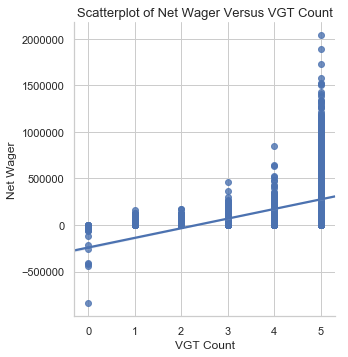

In [114]:
sns.set(style="whitegrid")
sns.lmplot(y="Net Wager", x="VGT Count", data=df4, fit_reg=True)
plt.xlabel("VGT Count")
plt.ylabel("Net Wager")
#plt.ylim(0,3.279708e+07)
plt.title("Scatterplot of Net Wager Versus VGT Count", fontsize=13)

In [119]:
print("The mean net wager per machine in a 5-machine establishment is", df4[df4["VGT Count"] == 5]["Net Wager"].mean() / 5)

The mean net wager per machine in a 5-machine establishment is 57506.362359916406


In [120]:
print("The mean net wager per machine in a 3-machine establishment is", df4[df4["VGT Count"] == 3]["Net Wager"].mean() / 3)

The mean net wager per machine in a 3-machine establishment is 19870.761396794245


In [121]:
print("The mean net wager per machine in a 1-machine establishment is", df4[df4["VGT Count"] == 1]["Net Wager"].mean())

The mean net wager per machine in a 1-machine establishment is 46301.692765957436


In [123]:
print("One machine in a 1-machine establishment produces", 
      (df4[df4["VGT Count"] == 1]["Net Wager"].mean() / (df4[df4["VGT Count"] == 5]["Net Wager"].mean() / 5)) * 100, 
      "percent of one machine in a 5-machine establishment.")

One machine in a 1-machine establishment produces 80.51577402195596 percent of one machine in a 5-machine establishment.


In [124]:
print("One machine in a 3-machine establishment produces", 
      ((df4[df4["VGT Count"] == 3]["Net Wager"].mean() / 3) / (df4[df4["VGT Count"] == 5]["Net Wager"].mean() / 5)) * 100, 
      "percent of one machine in a 5-machine establishment.")

One machine in a 3-machine establishment produces 34.55402251394141 percent of one machine in a 5-machine establishment.


## Here, my A/B test would look something like half of the establishments running with 3 VGTs (video game terminals) and the other half of the establishments running with 5 VGTs. My hypothesis is that establishments with 5 VGTs will make significantly more per machine than establishments with 3 VGTs. My key metric is the net wager per machine.